In [16]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/train.csv')
store_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/store.csv')
test_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/test.csv')  # Optional for validation

# Merge train and store datasets
merged_data = pd.merge(train_data, store_data, on='Store')

# Data Cleaning
# Check for missing values
missing_values = merged_data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Fill or drop missing values as necessary
# For example, fill CompetitionDistance with a suitable value (e.g., mean)
merged_data['CompetitionDistance'].fillna(merged_data['CompetitionDistance'].mean(), inplace=True)



C:\Users\User\AppData\Local\Temp\ipykernel_7668\2179485325.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/train.csv')


Missing values:
 CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


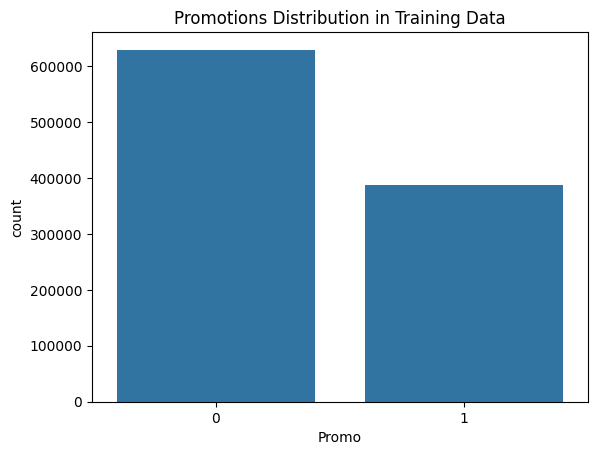

In [17]:
# 1. Promotions distribution between training and test sets
sns.countplot(x='Promo', data=train_data)
plt.title('Promotions Distribution in Training Data')
plt.show()

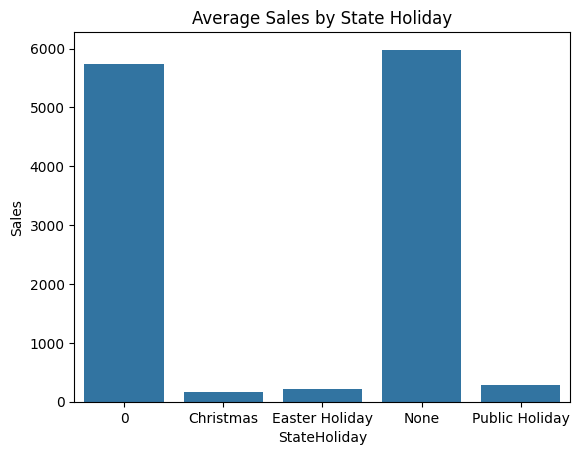

In [18]:
# 2. Sales behavior before, during, and after holidays
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['StateHoliday'] = merged_data['StateHoliday'].replace({'0': 'None', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'})

holiday_sales = merged_data.groupby('StateHoliday')['Sales'].mean().reset_index()
sns.barplot(x='StateHoliday', y='Sales', data=holiday_sales)
plt.title('Average Sales by State Holiday')
plt.show()

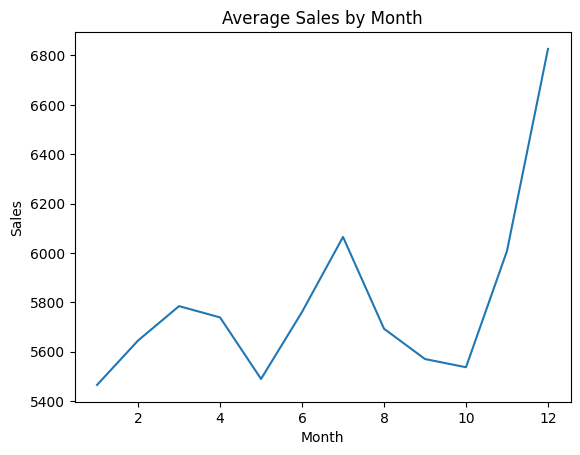

In [19]:
# 3. Seasonal purchase behaviors
seasonal_sales = merged_data.groupby(['Month'])['Sales'].mean().reset_index()
sns.lineplot(x='Month', y='Sales', data=seasonal_sales)
plt.title('Average Sales by Month')
plt.show()

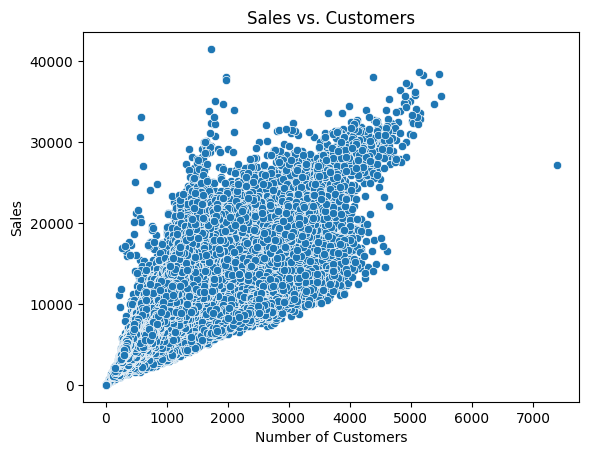

In [20]:
# 4. Correlation between sales and customers
sns.scatterplot(x='Customers', y='Sales', data=merged_data)
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

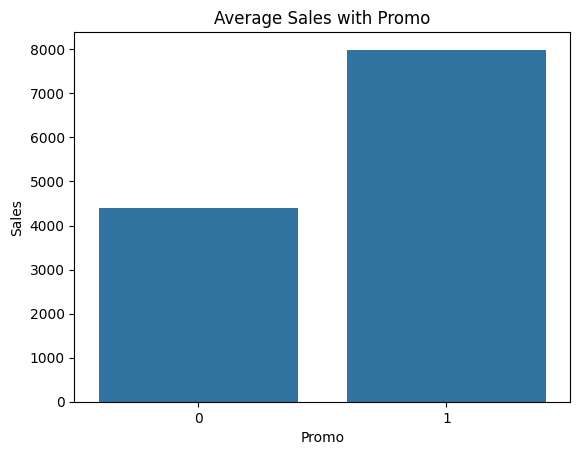

In [21]:
# 5. Effect of promo on sales
promo_sales = merged_data.groupby('Promo')['Sales'].mean().reset_index()
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Average Sales with Promo')
plt.show()

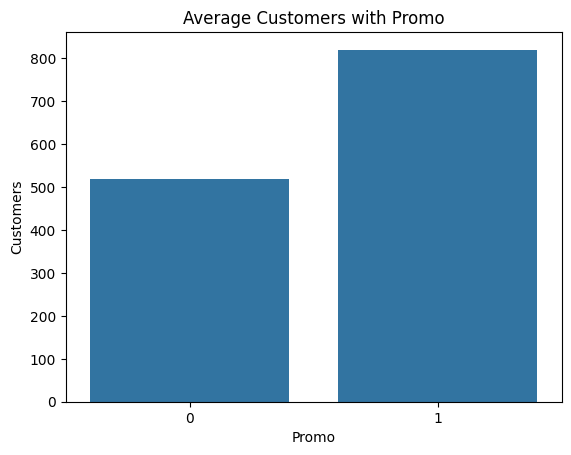

In [22]:
# 6. Check for stores that should deploy promos
promo_customers = merged_data.groupby('Promo')['Customers'].mean().reset_index()
sns.barplot(x='Promo', y='Customers', data=promo_customers)
plt.title('Average Customers with Promo')
plt.show()

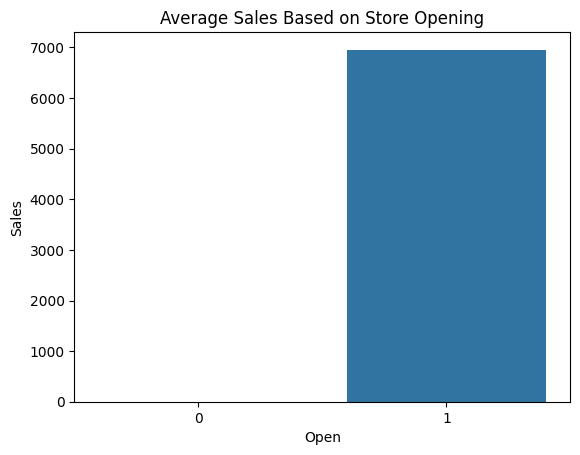

In [23]:
# 7. Trends of customer behavior during store opening and closing times
opening_hours = merged_data.groupby('Open')['Sales'].mean().reset_index()
sns.barplot(x='Open', y='Sales', data=opening_hours)
plt.title('Average Sales Based on Store Opening')
plt.show()